# CFAR 10

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.utils.multiclass import unique_labels

import os

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
import tensorflow as tf
from tensorflow import keras

from keras.applications import ResNet50


'Lastly import the final layers that will be added on top of the base model'
from tensorflow.keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout,UpSampling2D,GlobalAveragePooling2D,Conv2D

# Import dataset


In [4]:
from keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# Print the dimensions of the datasets to make sure everything's good

In [6]:
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


In [7]:
x_train=x_train/255
x_test=x_test/255

## Steps for building a transfer learning model:

* Build the model (Base Model + Flatten + Dense)

* Check model summary

* Initialize Batch Size,Number of Epochs
Compile model

* Fit the model 

* Evaluate the model on test data

# Build the model

In [8]:
'''For the 2nd base model we will use Resnet 50 and compare the
 performance against the previous one.'''
base_model = ResNet50(include_top=False,weights='imagenet',input_shape=(32, 32, 3))


In [29]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [30]:
# for layer in base_model.layers:
#     layer.trainable = False

# Set Model

In [31]:
#Since we have already defined Resnet50 as base_model_2, let us build the sequential model.

model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3,3),input_shape = (32,32,3), activation='relu',padding="same"))
# model.add(UpSampling2D(size=(7, 7)))
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,851,358 (90.99 MB)

 Trainable params: 23,798,238 (90.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Compile the model 


In [33]:

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Early Stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [35]:
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[early_stop])

Epoch 1/15
  5/625 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.0856 - loss: 4.5382 

W0000 00:00:1714287239.974980     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2420 - loss: 2.2667

W0000 00:00:1714287260.097523     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - accuracy: 0.2423 - loss: 2.2655 - val_accuracy: 0.1005 - val_loss: 6.0009
Epoch 2/15
  3/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5503 - loss: 1.3704

W0000 00:00:1714287263.354300     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.5565 - loss: 1.3174 - val_accuracy: 0.4953 - val_loss: 1.4718
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.6430 - loss: 1.0738 - val_accuracy: 0.6214 - val_loss: 1.1035
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6855 - loss: 0.9364 - val_accuracy: 0.6404 - val_loss: 1.0925
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7240 - loss: 0.8242 - val_accuracy: 0.6529 - val_loss: 1.1025
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7674 - loss: 0.7032 - val_accuracy: 0.6852 - val_loss: 0.9470
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7766 - loss: 0.6804 - val_accuracy: 0.6474 - val_loss: 1.1387
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8292 - loss: 0.5310 - val_accuracy: 0.7074 - val_loss: 0.9027
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.8402 - loss: 0.4932 - val_accurac

In [40]:
metrics = pd.DataFrame(model.history.history)

# Metrics

<Axes: >

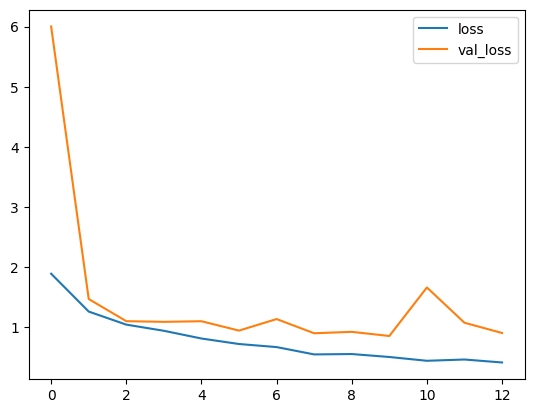

In [41]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

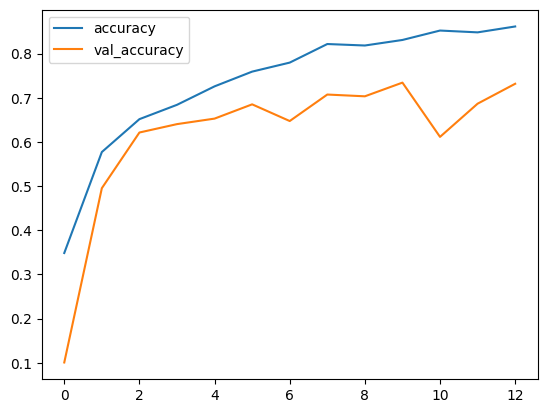

In [42]:
metrics[['accuracy', 'val_accuracy']].plot()

In [1]:
model.save('cccfar10_transfer.h5')

# Evaluate

In [48]:
prediction = model.predict(x_test)
predictions = [np.argmax(x, axis=0) for x in prediction]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1000
           1       0.86      0.80      0.83      1000
           2       0.63      0.69      0.66      1000
           3       0.55      0.57      0.56      1000
           4       0.72      0.66      0.69      1000
           5       0.62      0.68      0.65      1000
           6       0.82      0.74      0.77      1000
           7       0.79      0.76      0.77      1000
           8       0.83      0.81      0.82      1000
           9       0.88      0.76      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



In [52]:
import seaborn as sns

In [53]:
fig_class=[ "airplane", "automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]

<Axes: >

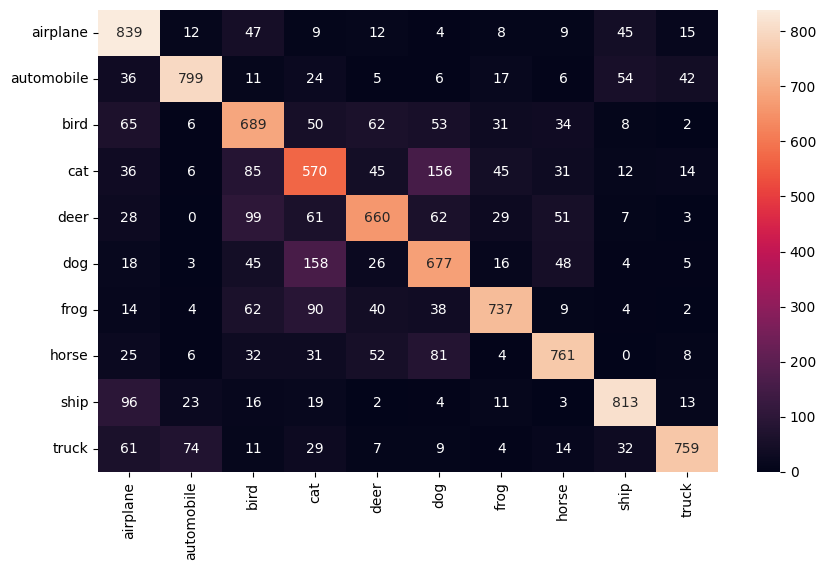

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt='d',xticklabels=fig_class,yticklabels=fig_class)

In [ ]:
def predict_classes(model, image):
  image = image.reshape(1, 32, 32, 3)
  prediction = model.predict(image)
  return np.argmax(prediction, axis=1)

In [42]:
def get_class(y):
  return np.argmax(y, axis=0)

In [43]:
get_class(y_test[500])

4

In [44]:
predict_classes(model_1, x_test[500])

1/1 [==============================] - 1s 593ms/step


array([6], dtype=int64)

In [45]:
predict_classes(model_2, x_test[500])

1/1 [==============================] - 0s 488ms/step


array([4], dtype=int64)

In [46]:
from tensorflow.keras.models import load_model

In [49]:
model_sgd= load_model("model/cfar10_transfer.h5")
#model_adam=load_model("model_adam.h5") To bigg

In [50]:
fig_class=[ "airplane", "automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]


CORRECT PREDICTIONS For Adam Optimizer


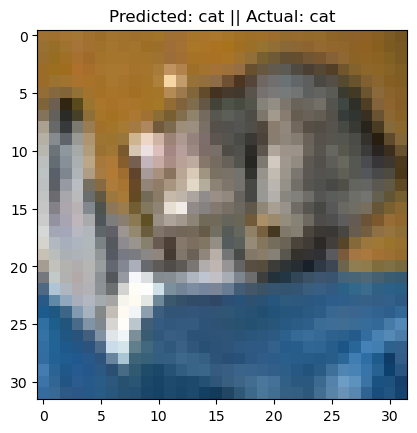

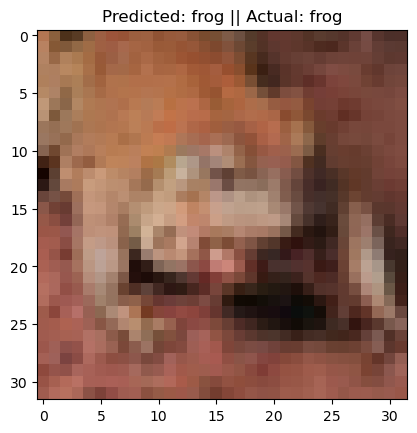

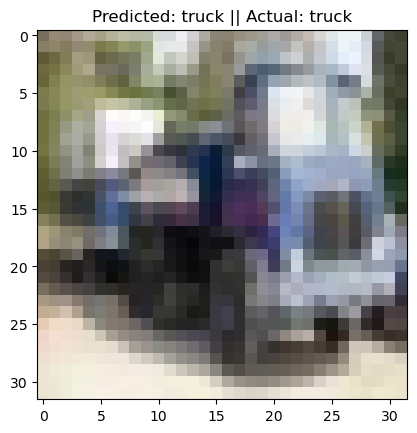

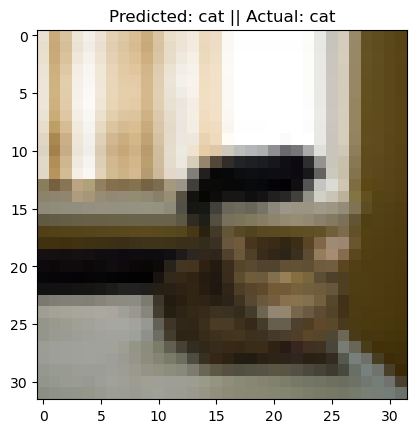

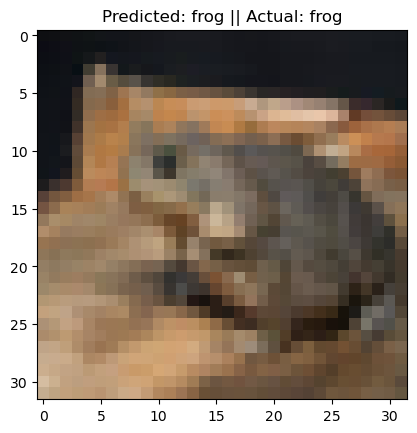

In [51]:
#Lets see which predictions were correct and which were incorrect
count=0

#Correct Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
   # test_image=test_image.resize((32,32))
    
    test_image=x_test[i].reshape(1,32,32,3)
    
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    
    #plotting
    index=(np.where(y_test[i]==1))[0][0]
    if(index==prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[index]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break

INCORRECT PREDICTIONS for adam


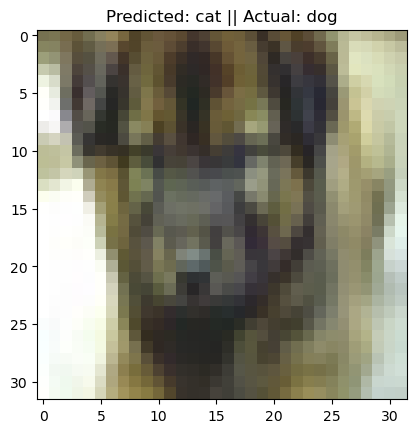

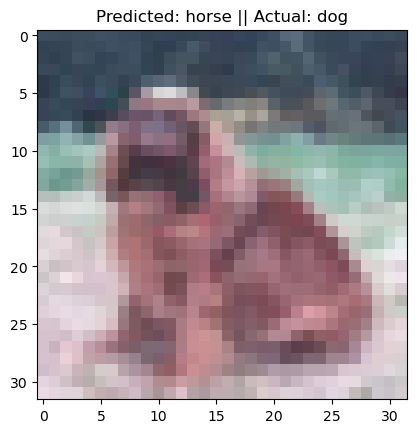

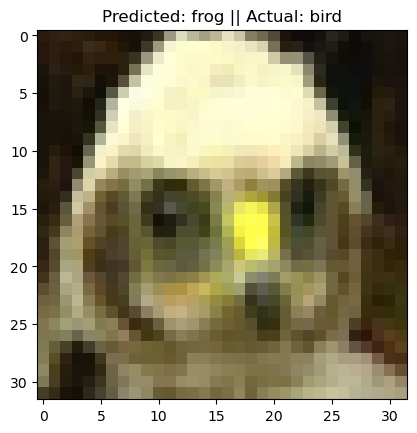

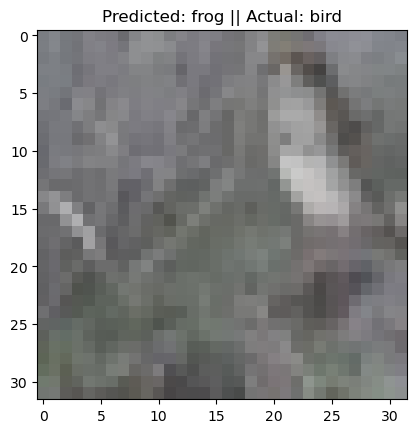

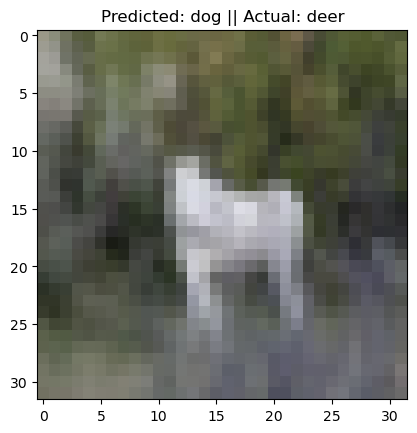

In [53]:
#Lets see which predictions were incorrect 
count=0
#InCorrect Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model_2.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    index=(np.where(y_test[i]==1))[0][0]
    
    #plotting
    if(int(index)!=prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[index]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            